### This Notebook is to understand the basic implementation of Logistic regression

In [1]:
import csv
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def loadCSV(filename):
    '''
    function to load dataset
    '''
    with open(filename,"r") as csvfile:
        lines = csv.reader(csvfile)
        dataset = list(lines)
    for i in range(len(dataset)):
        dataset[i] = [float(x) for x in dataset[i]]	
    return np.array(dataset)


def normalize(X):
    '''
    function to normalize feature matrix, X
    '''
    mins = np.min(X, axis = 0)
    maxs = np.max(X, axis = 0)
    rng = maxs - mins
    norm_X = 1 - ((maxs - X)/rng)
    return norm_X


def logistic_func(beta, X):
    '''
    logistic(sigmoid) function
    '''
    return 1.0/(1 + np.exp(-np.dot(X, beta.T)))


def log_gradient(beta, X, y):
    '''
    logistic gradient function
    '''
    first_calc = logistic_func(beta, X) - y.reshape(X.shape[0], -1)
    final_calc = np.dot(first_calc.T, X)
    return final_calc


def cost_func(beta, X, y):
    '''
    cost function, J
    '''
    log_func_v = logistic_func(beta, X)
    y = np.squeeze(y)
    step1 = y * np.log(log_func_v)
    step2 = (1 - y) * np.log(1 - log_func_v)
    final = -step1 - step2
    return np.mean(final)




def pred_values(beta, X):
    '''
    function to predict labels
    '''
    pred_prob = logistic_func(beta, X)
    pred_value = np.where(pred_prob >= .5, 1, 0)
    return np.squeeze(pred_value)


def plot_reg(X, y, beta):
    '''
    function to plot decision boundary
    '''
    # labelled observations
    x_0 = X[np.where(y == 0.0)]
    x_1 = X[np.where(y == 1.0)]

    # plotting points with diff color for diff label
    plt.scatter([x_0[:, 1]], [x_0[:, 2]], c='b', label='y = 0')
    plt.scatter([x_1[:, 1]], [x_1[:, 2]], c='r', label='y = 1')

    # plotting decision boundary
    x1 = np.arange(0, 1, 0.1)
    x2 = -(beta[0,0] + beta[0,1]*x1)/beta[0,2]
    plt.plot(x1, x2, c='k', label='reg line')

    plt.xlabel('x1')
    plt.ylabel('x2')
    plt.legend()
    plt.show()


In [3]:
# Laod the Dataset
dataset = loadCSV('dataset1.csv')
dataset.view()

array([[4.5192, 2.6487, 1.    ],
       [2.4443, 1.5438, 1.    ],
       [4.2409, 1.899 , 1.    ],
       [5.8097, 2.4711, 1.    ],
       [6.4423, 3.359 , 1.    ],
       [5.8097, 3.2406, 1.    ],
       [6.3917, 3.8128, 1.    ],
       [6.8725, 4.4441, 1.    ],
       [6.7966, 3.6747, 1.    ],
       [8.163 , 4.7401, 1.    ],
       [7.4038, 3.8917, 1.    ],
       [7.6316, 4.602 , 1.    ],
       [7.7581, 5.7265, 1.    ],
       [6.5688, 4.9571, 1.    ],
       [5.3543, 3.9903, 1.    ],
       [4.4686, 3.0236, 1.    ],
       [2.9757, 2.0568, 1.    ],
       [2.4443, 1.2676, 1.    ],
       [0.9008, 1.169 , 1.    ],
       [2.1154, 1.7411, 1.    ],
       [3.2794, 1.386 , 1.    ],
       [4.165 , 1.5636, 1.    ],
       [4.8482, 1.8793, 1.    ],
       [3.33  , 2.7868, 1.    ],
       [5.1518, 3.5563, 1.    ],
       [6.2652, 4.0693, 1.    ],
       [6.2652, 4.3849, 1.    ],
       [7.2014, 1.5438, 1.    ],
       [7.6569, 2.412 , 1.    ],
       [6.1387, 1.7806, 1.    ],
       [4.

In [4]:
# normalizing feature matrix
X = normalize(dataset[:, :-1])
print(X)

[[0.45109895 0.1999973 ]
 [0.19242517 0.05065823]
 [0.41640382 0.09866732]
 [0.6119831  0.17599276]
 [0.69084812 0.29600195]
 [0.6119831  0.27999892]
 [0.68453991 0.35733787]
 [0.74448032 0.44266483]
 [0.73501801 0.33867218]
 [0.90536447 0.4826724 ]
 [0.81071647 0.36800205]
 [0.83911585 0.4640067 ]
 [0.85488637 0.61599492]
 [0.70661863 0.51200227]
 [0.55520926 0.3813289 ]
 [0.44479074 0.25066905]
 [0.25867378 0.11999567]
 [0.19242517 0.01332685]
 [0.         0.        ]
 [0.15142184 0.07732544]
 [0.29653547 0.02932987]
 [0.40694152 0.05333441]
 [0.49211474 0.09600465]
 [0.30284368 0.21866299]
 [0.52996397 0.32266915]
 [0.6687694  0.3920066 ]
 [0.6687694  0.43466331]
 [0.78548365 0.05065823]
 [0.84226996 0.16800476]
 [0.65299889 0.08266429]
 [0.44794485 0.03199254]
 [0.49526885 0.19467196]
 [0.57728797 0.25867056]
 [0.63721591 0.37332739]
 [0.77917545 0.48533506]
 [0.84857816 0.55999784]
 [0.92428908 0.61333225]
 [0.9495219  0.53333063]
 [0.97790882 0.5733382 ]
 [0.86750277 0.35733787]


In [5]:
# stacking columns with all ones in feature matrix
X = np.hstack((np.matrix(np.ones(X.shape[0])).T, X))
print(X)

[[1.         0.45109895 0.1999973 ]
 [1.         0.19242517 0.05065823]
 [1.         0.41640382 0.09866732]
 [1.         0.6119831  0.17599276]
 [1.         0.69084812 0.29600195]
 [1.         0.6119831  0.27999892]
 [1.         0.68453991 0.35733787]
 [1.         0.74448032 0.44266483]
 [1.         0.73501801 0.33867218]
 [1.         0.90536447 0.4826724 ]
 [1.         0.81071647 0.36800205]
 [1.         0.83911585 0.4640067 ]
 [1.         0.85488637 0.61599492]
 [1.         0.70661863 0.51200227]
 [1.         0.55520926 0.3813289 ]
 [1.         0.44479074 0.25066905]
 [1.         0.25867378 0.11999567]
 [1.         0.19242517 0.01332685]
 [1.         0.         0.        ]
 [1.         0.15142184 0.07732544]
 [1.         0.29653547 0.02932987]
 [1.         0.40694152 0.05333441]
 [1.         0.49211474 0.09600465]
 [1.         0.30284368 0.21866299]
 [1.         0.52996397 0.32266915]
 [1.         0.6687694  0.3920066 ]
 [1.         0.6687694  0.43466331]
 [1.         0.78548365 0.05

In [6]:
# response vector
y = dataset[:, -1]

In [7]:
# initial beta values
beta = np.matrix(np.zeros(X.shape[1]))
print(beta)

[[0. 0. 0.]]


In [8]:
# beta values after running gradient descent
def grad_desc(X, y, beta, lr=.01, converge_change=.001):
    '''
    gradient descent function
    '''
    cost = cost_func(beta, X, y)
    change_cost = 1
    num_iter = 1

    while(change_cost > converge_change):
        old_cost = cost
        beta = beta - (lr * log_gradient(beta, X, y))
        cost = cost_func(beta, X, y)
        change_cost = old_cost - cost
        num_iter += 1
        print(beta)

    return beta, num_iter

beta, num_iter = grad_desc(X, y, beta)

[[ 0.          0.0506307  -0.09159659]]
[[ 0.00474743  0.10323576 -0.17940147]]
[[ 0.01231687  0.15675022 -0.26445136]]
[[ 0.02153391  0.21052856 -0.34738627]]
[[ 0.03168324  0.26418171 -0.42860374]]
[[ 0.04232984  0.31747715 -0.50835333]]
[[ 0.05320965  0.37027791 -0.58679438]]
[[ 0.06416283  0.4225053  -0.6640313 ]]
[[ 0.0750931   0.47411616 -0.74013499]]
[[ 0.08594292  0.52508902 -0.81515595]]
[[ 0.09667834  0.5754156  -0.88913221]]
[[ 0.10727979  0.62509566 -0.96209416]]
[[ 0.11773649  0.67413383 -1.03406751]]
[[ 0.128043    0.72253769 -1.10507501]]
[[ 0.13819711  0.77031656 -1.17513759]]
[[ 0.14819862  0.81748082 -1.24427494]]
[[ 0.15804852  0.86404138 -1.31250592]]
[[ 0.16774851  0.91000947 -1.37984883]]
[[ 0.17730074  0.95539644 -1.44632147]]
[[ 0.18670759  1.00021364 -1.51194128]]
[[ 0.1959716   1.04447237 -1.57672533]]
[[ 0.20509536  1.08818378 -1.64069041]]
[[ 0.21408151  1.13135893 -1.70385299]]
[[ 0.22293266  1.17400868 -1.76622921]]
[[ 0.23165143  1.21614373 -1.82783495]]


[[ 0.9619512   5.80262706 -8.31738229]]
[[ 0.96325875  5.81435115 -8.33329763]]
[[ 0.9645604   5.82604184 -8.34916466]]
[[ 0.96585622  5.83769932 -8.36498369]]
[[ 0.96714624  5.84932383 -8.38075504]]
[[ 0.96843051  5.86091555 -8.39647904]]
[[ 0.96970908  5.87247471 -8.41215598]]
[[ 0.970982    5.8840015  -8.42778619]]
[[ 0.97224933  5.89549612 -8.44336998]]
[[ 0.97351109  5.90695878 -8.45890763]]
[[ 0.97476734  5.91838967 -8.47439946]]
[[ 0.97601813  5.929789   -8.48984577]]
[[ 0.97726349  5.94115695 -8.50524684]]
[[ 0.97850349  5.95249371 -8.52060297]]
[[ 0.97973814  5.96379949 -8.53591445]]
[[ 0.98096751  5.97507446 -8.55118157]]
[[ 0.98219164  5.98631881 -8.56640461]]
[[ 0.98341056  5.99753273 -8.58158385]]
[[ 0.98462431  6.00871641 -8.59671956]]
[[ 0.98583295  6.01987002 -8.61181203]]
[[ 0.98703651  6.03099374 -8.62686153]]
[[ 0.98823503  6.04208776 -8.64186832]]
[[ 0.98942855  6.05315225 -8.65683268]]
[[ 0.99061712  6.06418738 -8.67175486]]
[[ 0.99180076  6.07519333 -8.68663514]]


[[  1.16116694   7.82165001 -11.02231035]]
[[  1.16181833   7.82900901 -11.03206607]]
[[  1.16246827   7.83635617 -11.04180553]]
[[  1.16311676   7.84369153 -11.05152878]]
[[  1.1637638    7.85101512 -11.0612359 ]]
[[  1.16440941   7.85832699 -11.07092693]]
[[  1.1650536    7.86562718 -11.08060194]]
[[  1.16569635   7.87291574 -11.09026099]]
[[  1.1663377    7.88019269 -11.09990413]]
[[  1.16697763   7.88745809 -11.10953143]]
[[  1.16761617   7.89471198 -11.11914293]]
[[  1.16825331   7.90195439 -11.12873871]]
[[  1.16888906   7.90918536 -11.13831882]]
[[  1.16952342   7.91640495 -11.14788331]]
[[  1.17015641   7.92361317 -11.15743225]]
[[  1.17078804   7.93081009 -11.16696568]]
[[  1.17141829   7.93799572 -11.17648367]]
[[  1.1720472    7.94517013 -11.18598627]]
[[  1.17267475   7.95233333 -11.19547354]]
[[  1.17330095   7.95948538 -11.20494553]]
[[  1.17392582   7.9666263  -11.21440229]]
[[  1.17454936   7.97375615 -11.22384389]]
[[  1.17517157   7.98087495 -11.23327037]]
[[  1.17579

[[  1.27601083   9.18500896 -12.82184521]]
[[  1.2764554    9.19052113 -12.82909488]]
[[  1.27689933   9.19602707 -12.83633618]]
[[  1.27734264   9.2015268  -12.84356916]]
[[  1.27778532   9.20702033 -12.85079381]]
[[  1.27822736   9.21250768 -12.85801017]]
[[  1.27866879   9.21798886 -12.86521826]]
[[  1.27910959   9.22346389 -12.87241809]]
[[  1.27954977   9.22893279 -12.87960969]]
[[  1.27998933   9.23439556 -12.88679309]]
[[  1.28042827   9.23985223 -12.89396829]]
[[  1.2808666    9.24530281 -12.90113533]]
[[  1.28130432   9.25074732 -12.90829422]]
[[  1.28174142   9.25618577 -12.91544499]]
[[  1.28217792   9.26161817 -12.92258765]]
[[  1.2826138    9.26704454 -12.92972222]]
[[  1.28304908   9.2724649  -12.93684873]]
[[  1.28348376   9.27787926 -12.9439672 ]]
[[  1.28391783   9.28328763 -12.95107764]]
[[  1.2843513    9.28869003 -12.95818008]]
[[  1.28478418   9.29408648 -12.96527454]]
[[  1.28521646   9.29947698 -12.97236104]]
[[  1.28564814   9.30486156 -12.97943959]]
[[  1.28607

[[  1.36133899  10.27036721 -14.24655937]]
[[  1.36167981  10.27480386 -14.2523735 ]]
[[  1.36202028  10.27923668 -14.25818254]]
[[  1.3623604   10.28366567 -14.26398649]]
[[  1.36270018  10.28809085 -14.26978538]]
[[  1.3630396   10.29251221 -14.2755792 ]]
[[  1.36337867  10.29692976 -14.28136796]]
[[  1.3637174   10.30134352 -14.28715168]]
[[  1.36405578  10.30575348 -14.29293037]]
[[  1.36439381  10.31015966 -14.29870404]]
[[  1.3647315   10.31456207 -14.30447269]]
[[  1.36506885  10.31896071 -14.31023634]]
[[  1.36540585  10.32335558 -14.31599499]]
[[  1.36574251  10.3277467  -14.32174866]]
[[  1.36607882  10.33213407 -14.32749736]]
[[  1.3664148   10.33651771 -14.33324109]]
[[  1.36675043  10.34089761 -14.33897986]]
[[  1.36708573  10.34527378 -14.34471369]]
[[  1.36742068  10.34964623 -14.35044258]]
[[  1.3677553   10.35401498 -14.35616655]]
[[  1.36808958  10.35838002 -14.3618856 ]]
[[  1.36842353  10.36274136 -14.36759974]]
[[  1.36875713  10.36709901 -14.37330898]]
[[  1.36909

[[  1.46828024  11.69570537 -16.11149094]]
[[  1.46852928  11.69909626 -16.11592159]]
[[  1.46877815  11.70248504 -16.12034949]]
[[  1.46902684  11.70587174 -16.12477462]]
[[  1.46927535  11.70925634 -16.129197  ]]
[[  1.46952369  11.71263885 -16.13361663]]
[[  1.46977185  11.71601928 -16.1380335 ]]
[[  1.47001984  11.71939763 -16.14244763]]
[[  1.47026765  11.7227739  -16.14685902]]
[[  1.47051529  11.72614809 -16.15126767]]
[[  1.47076275  11.7295202  -16.15567359]]
[[  1.47101004  11.73289025 -16.16007678]]
[[  1.47125715  11.73625823 -16.16447724]]
[[  1.47150409  11.73962414 -16.16887498]]
[[  1.47175086  11.742988   -16.17327   ]]
[[  1.47199746  11.74634979 -16.17766231]]
[[  1.47224388  11.74970952 -16.18205191]]
[[  1.47249012  11.75306721 -16.1864388 ]]
[[  1.4727362   11.75642284 -16.19082298]]
[[  1.47298211  11.75977642 -16.19520447]]
[[  1.47322784  11.76312796 -16.19958326]]
[[  1.4734734   11.76647746 -16.20395935]]
[[  1.47371879  11.76982491 -16.20833276]]
[[  1.47396

[[  1.55535893  12.89931477 -17.68274434]]
[[  1.55555425  12.90205339 -17.68631645]]
[[  1.55574946  12.90479071 -17.68988686]]
[[  1.55594457  12.90752675 -17.69345557]]
[[  1.55613958  12.91026149 -17.69702258]]
[[  1.55633448  12.91299494 -17.7005879 ]]
[[  1.55652928  12.9157271  -17.70415152]]
[[  1.55672397  12.91845798 -17.70771345]]
[[  1.55691857  12.92118757 -17.71127369]]
[[  1.55711305  12.92391587 -17.71483223]]
[[  1.55730744  12.92664289 -17.7183891 ]]
[[  1.55750172  12.92936862 -17.72194427]]
[[  1.5576959   12.93209308 -17.72549776]]
[[  1.55788997  12.93481625 -17.72904958]]
[[  1.55808394  12.93753815 -17.73259971]]
[[  1.55827781  12.94025877 -17.73614816]]
[[  1.55847158  12.94297811 -17.73969494]]
[[  1.55866524  12.94569618 -17.74324004]]
[[  1.5588588   12.94841298 -17.74678347]]
[[  1.55905226  12.95112851 -17.75032522]]
[[  1.55924562  12.95384276 -17.75386531]]
[[  1.55943888  12.95655575 -17.75740373]]
[[  1.55963203  12.95926747 -17.76094049]]
[[  1.55982

[[  1.59548314  13.4653857  -18.42083096]]
[[  1.59565833  13.46787233 -18.42407207]]
[[  1.59583343  13.47035792 -18.42731181]]
[[  1.59600845  13.47284246 -18.43055018]]
[[  1.59618339  13.47532597 -18.43378719]]
[[  1.59635824  13.47780844 -18.43702284]]
[[  1.59653302  13.48028987 -18.44025712]]
[[  1.59670771  13.48277027 -18.44349005]]
[[  1.59688232  13.48524963 -18.44672162]]
[[  1.59705685  13.48772796 -18.44995183]]
[[  1.5972313   13.49020525 -18.45318068]]
[[  1.59740566  13.49268152 -18.45640818]]
[[  1.59757994  13.49515675 -18.45963433]]
[[  1.59775415  13.49763095 -18.46285912]]
[[  1.59792827  13.50010412 -18.46608256]]
[[  1.5981023   13.50257627 -18.46930465]]
[[  1.59827626  13.50504738 -18.4725254 ]]
[[  1.59845014  13.50751748 -18.47574479]]
[[  1.59862393  13.50998654 -18.47896284]]
[[  1.59879765  13.51245458 -18.48217955]]
[[  1.59897128  13.5149216  -18.48539491]]
[[  1.59914483  13.5173876  -18.48860893]]
[[  1.5993183   13.51985257 -18.49182161]]
[[  1.59949

[[  1.66195734  14.41805829 -19.66186484]]
[[  1.66210424  14.42018341 -19.6646317 ]]
[[  1.66225108  14.42230779 -19.6673976 ]]
[[  1.66239787  14.42443145 -19.67016255]]
[[  1.6625446   14.42655438 -19.67292654]]
[[  1.66269127  14.42867658 -19.67568958]]
[[  1.66283789  14.43079806 -19.67845167]]
[[  1.66298445  14.43291881 -19.6812128 ]]
[[  1.66313095  14.43503883 -19.68397298]]
[[  1.6632774   14.43715813 -19.68673222]]
[[  1.6634238  14.4392767 -19.6894905]]
[[  1.66357013  14.44139455 -19.69224783]]
[[  1.66371642  14.44351167 -19.69500422]]
[[  1.66386264  14.44562807 -19.69775965]]
[[  1.66400881  14.44774375 -19.70051414]]
[[  1.66415493  14.44985871 -19.70326769]]
[[  1.66430098  14.45197295 -19.70602028]]
[[  1.66444699  14.45408646 -19.70877194]]
[[  1.66459294  14.45619926 -19.71152265]]
[[  1.66473883  14.45831133 -19.71427241]]
[[  1.66488466  14.46042269 -19.71702124]]
[[  1.66503044  14.46253333 -19.71976912]]
[[  1.66517617  14.46464325 -19.72251606]]
[[  1.66532184

[[  1.69054696  14.83325144 -20.20231722]]
[[  1.69068336  14.8352399  -20.204905  ]]
[[  1.69081971  14.83722774 -20.20749197]]
[[  1.69095601  14.83921495 -20.21007811]]
[[  1.69109226  14.84120153 -20.21266343]]
[[  1.69122847  14.84318749 -20.21524793]]
[[  1.69136463  14.84517282 -20.21783161]]
[[  1.69150074  14.84715753 -20.22041447]]
[[  1.6916368   14.84914161 -20.22299652]]
[[  1.69177281  14.85112507 -20.22557774]]
[[  1.69190878  14.8531079  -20.22815815]]
[[  1.6920447   14.85509011 -20.23073774]]
[[  1.69218057  14.8570717  -20.23331652]]
[[  1.69231639  14.85905267 -20.23589448]]
[[  1.69245217  14.86103301 -20.23847163]]
[[  1.6925879   14.86301273 -20.24104797]]
[[  1.69272358  14.86499183 -20.24362349]]
[[  1.69285921  14.86697031 -20.24619819]]
[[  1.6929948   14.86894818 -20.24877209]]
[[  1.69313034  14.87092542 -20.25134517]]
[[  1.69326583  14.87290204 -20.25391744]]
[[  1.69340127  14.87487804 -20.2564889 ]]
[[  1.69353667  14.87685343 -20.25905955]]
[[  1.69367

Estimated regression coefficients: [[  1.70474504  15.04062212 -20.47216021]]
No. of iterations: 2612
Correctly predicted labels: 100


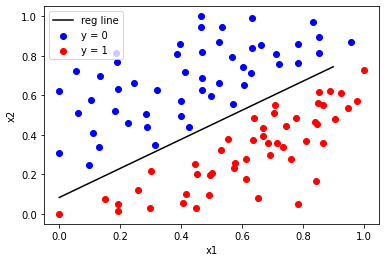

In [10]:



# estimated beta values and number of iterations
print("Estimated regression coefficients:", beta)
print("No. of iterations:", num_iter)

# predicted labels
y_pred = pred_values(beta, X)

# number of correctly predicted labels
print("Correctly predicted labels:", np.sum(y == y_pred))

# plotting regression line
plot_reg(X, y, beta)
